<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [60]:
#drug_link = './datasets/drug-use-by-age.csv'
sat_link = './sat_scores.csv'
#drug = pd.read_csv(drug_link)
sat = pd.read_csv(sat_link)
sat_original = pd.read_csv(sat_link)
sat.head()

#.to_dict().values()
sat_dict = sat.to_dict()
sat_dict2 = {a:[sat_dict[a][i] for i, b in enumerate(sat_dict[a])] for a in sat_dict}
sat_dict2

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'Verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  56

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
pd.DataFrame.from_dict(sat_dict2).dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [5]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

#### ANSWER: Once I load the dictionary to a dataframe, there is no difference between the read_csv function and the new dataframe created from my dictionary

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

#### ANSWER:
#### State Column indicates each state (52 states) where people take their SATs
#### Rate Column indicates participation rate among the people taking the SATs
#### Verbal & Maths Columns indicates the respective component score of the SATs where 800 is full marks
#### See below for info on the first 10 rows of the dataframe

In [6]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

#### ANSWER:

'State' = object (each of the 50 + 2 states in the US)
'Rate' = int64 (rate of participation of the SATs in each state)
'Verbal' = int64 (Average verbal scores in each state out of 800)
'Math' = int64 (Average math scores in each state out of 800)

In [7]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

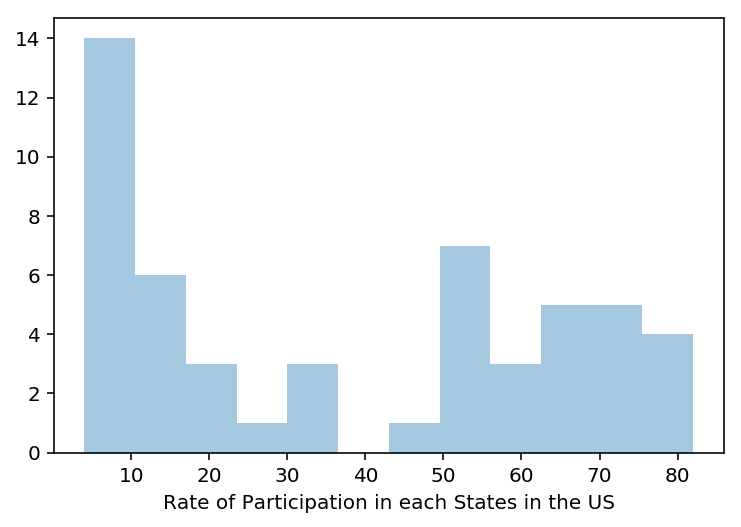

In [8]:
sns.distplot(sat['Rate'],kde=False, bins=12,axlabel='Rate of Participation in each States in the US')

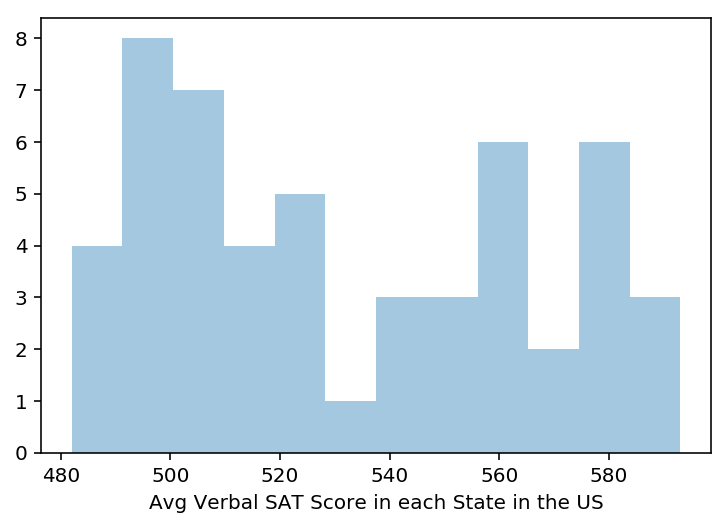

In [9]:
sns.distplot(sat['Verbal'],kde=False, bins=12,axlabel='Avg Verbal SAT Score in each State in the US')

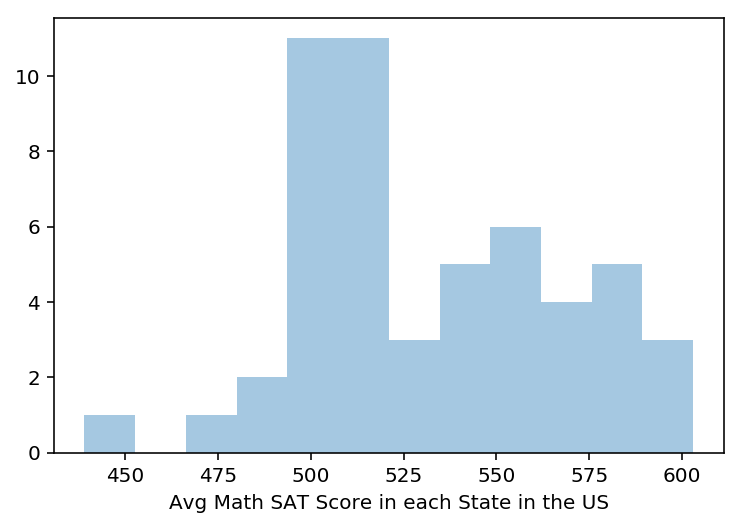

In [10]:
sns.distplot(sat['Math'],kde=False, bins=12, axlabel='Avg Math SAT Score in each State in the US')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

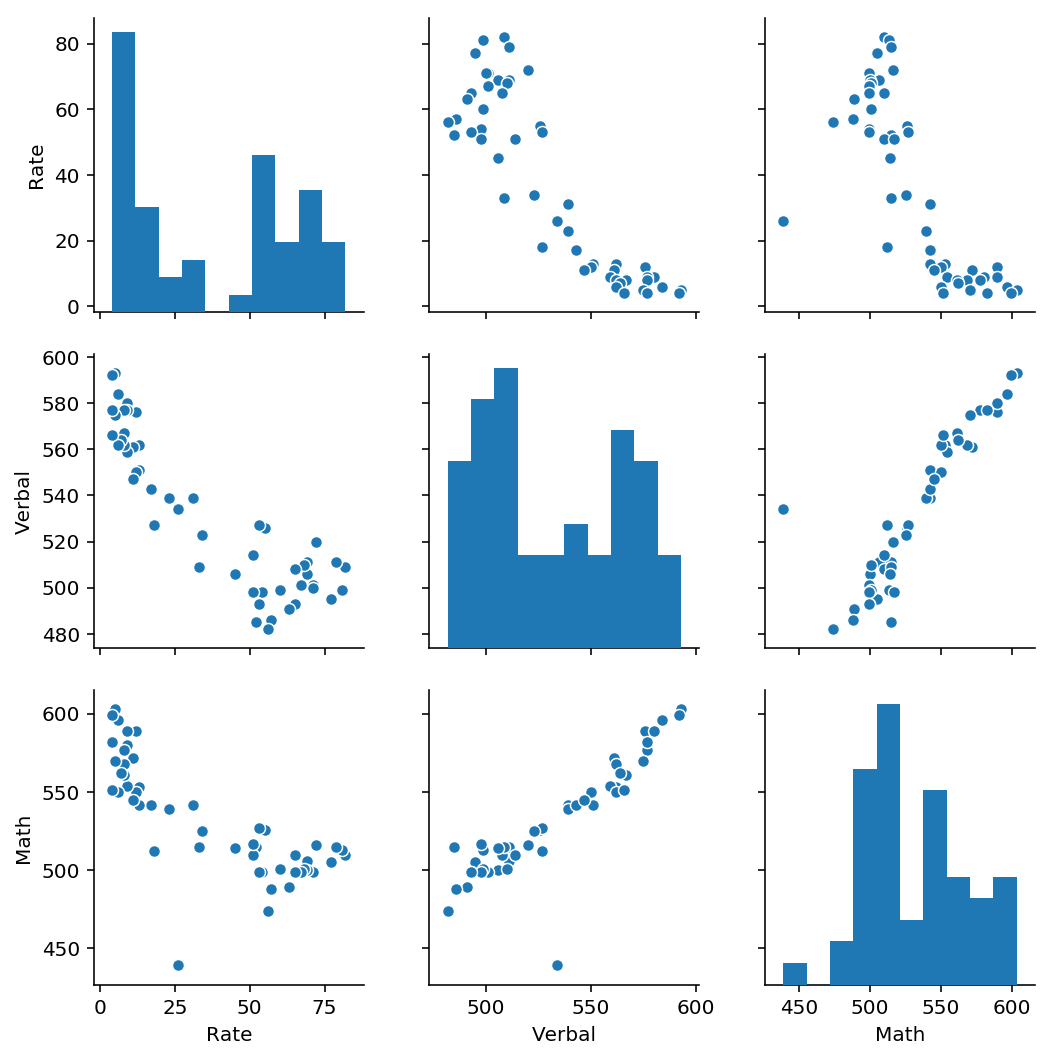

In [11]:
sns.pairplot(sat)

# generally fairly strong positive correlation between math and verbal scores
# Less and negative correlation between participation rate and math and verbal scores 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [12]:
sat['Total'] = sat['Verbal'] + sat['Math']
sat_sorted = sat.sort_values(['Total'],ascending = False)
sat_sorted.head()

,State,Rate,Verbal,Math,Total
47,IA,5,593,603,1196
49,ND,4,592,599,1191
44,WI,6,584,596,1180
37,MN,9,580,589,1169
33,IL,12,576,589,1165


[Text(0, 0, 'CT'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'ME'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'AZ'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'WY'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'AL'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'All')]

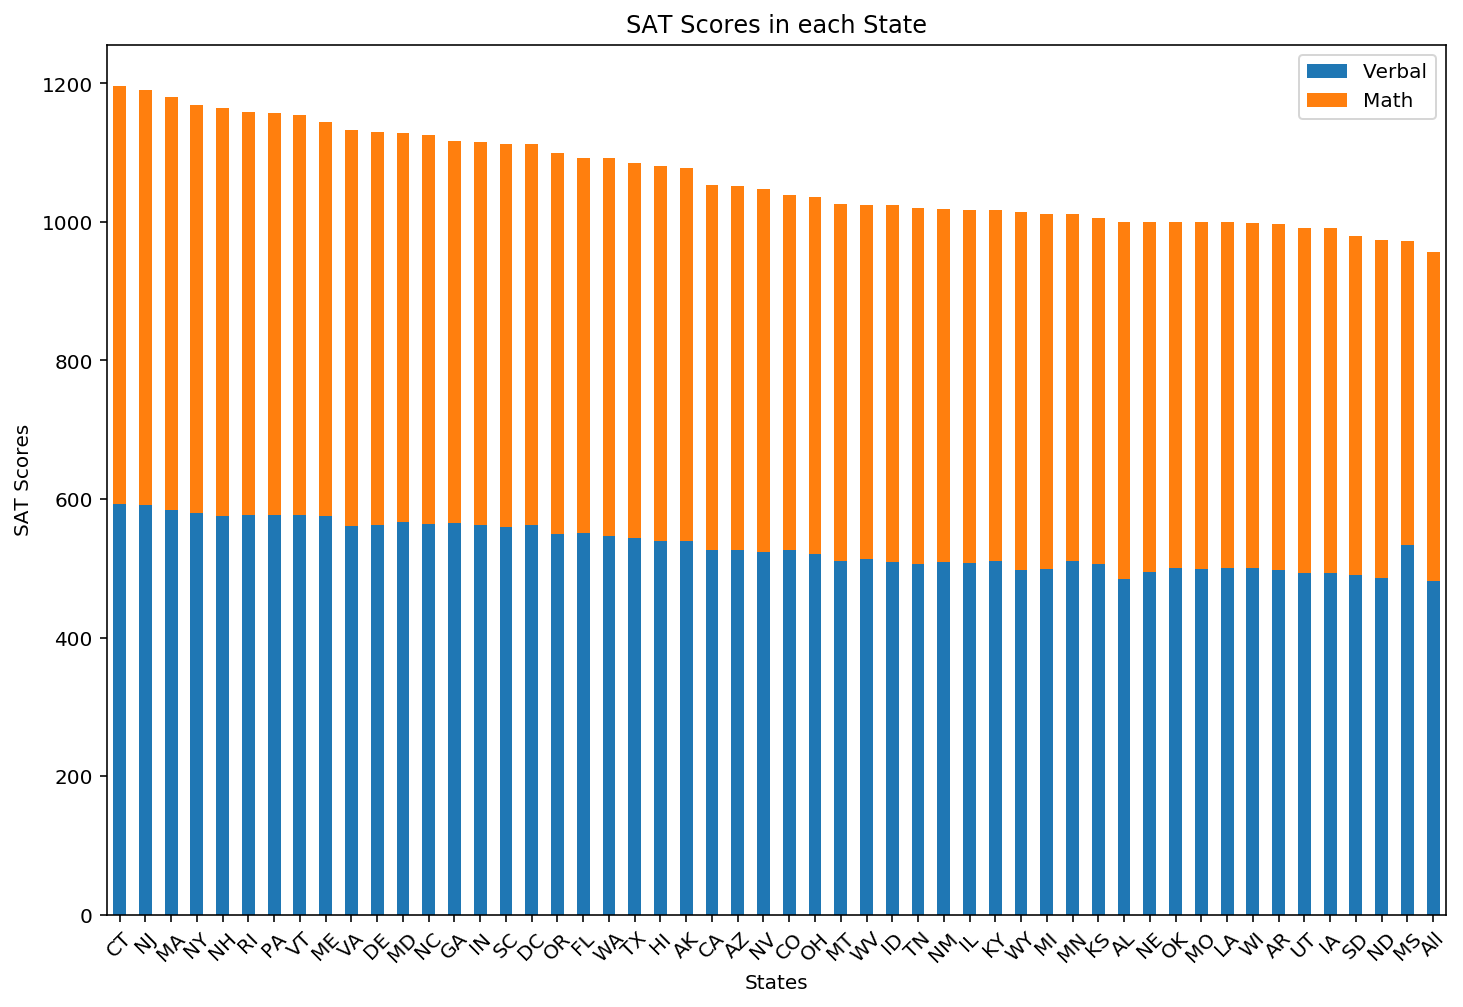

In [13]:
# Alternative

# ax = sat[['Verbal','Math']].plot(kind='bar', stacked = True, rot= 45, figsize=(12, 8))


ax = sat_sorted[['Verbal','Math']].plot(kind='bar', 
                            stacked = True, 
                            rot= 45, 
                            figsize=(12, 8))
x_labels = sat['State']
ax.set_title('SAT Scores in each State')
ax.set_xlabel('States')
ax.set_ylabel('SAT Scores')
ax.set_xticklabels(x_labels)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

#### ANSWER:

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
Able to see the median, outliers and where the interquartile range of the values

What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
Comparing Rate vs Math and Verbal is different as Rate is measured in percentage while Math and Verbal have full scores of 800. Math and Verbal scores are more comparable againist each other as they are of the same scale. For Rate to be compared with Math and Verbal scores, the values need to be standardized

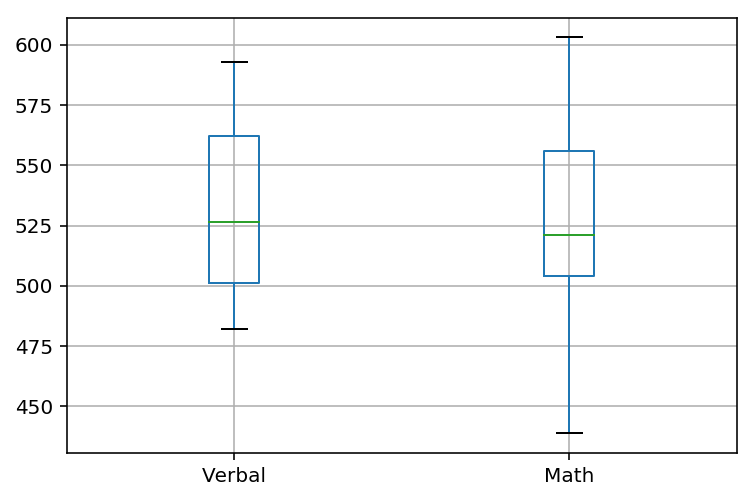

In [14]:
sat[['Verbal','Math']].boxplot()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [15]:
# I am dividing the SAT scores with the full score of 800 then multiplying it back by 100 (hence just dividing by 8) so as to get a percentage

sat['Verbal'] = round(sat['Verbal']/8,1)
sat['Math'] = round(sat['Math']/8,1)

In [16]:
sat.columns = ['State', 'Rate %', 'Verbal %', 'Math %', 'Total']
sat.head()

,State,Rate %,Verbal %,Math %,Total
0,CT,82,63.6,63.8,1019
1,NJ,81,62.4,64.1,1012
2,MA,79,63.9,64.4,1026
3,NY,77,61.9,63.1,1000
4,NH,72,65.0,64.5,1036


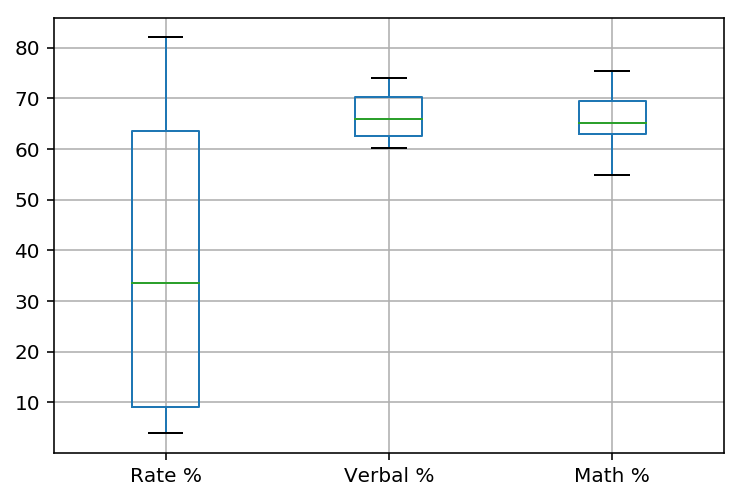

In [17]:
sat[['Rate %', 'Verbal %', 'Math %']].boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
sat_original.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [19]:
np.mean(sat_original['Verbal'])

532.0192307692307

In [20]:
verbal_mean = np.mean(sat_original['Verbal'])
print('Overall Verbal Mean score is', verbal_mean)
sat_original[sat_original['Verbal'] > verbal_mean][['State','Verbal']].head()

Overall Verbal Mean score is 532.0192307692307


,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
verbal_median = np.median(sat_original['Verbal'])
print('Overall Verbal Median score is', verbal_median)
sat_original[sat_original['Verbal'] > verbal_median][['State','Verbal']].head()

Overall Verbal Median score is 526.5


,State,Verbal
19,WA,527
26,CO,539
27,OH,534
28,MT,539
29,WV,527


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [22]:
sat2 = sat_original
sat2['Verbal - Math'] = sat2['Verbal'] - sat2['Math']
sat2.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
# creating another column
sat2['Math - Verbal'] = sat2['Math'] - sat2['Verbal']
sat2.head()

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal
0,CT,82,509,510,-1,1
1,NJ,81,499,513,-14,14
2,MA,79,511,515,-4,4
3,NY,77,495,505,-10,10
4,NH,72,520,516,4,-4


In [24]:
sat2_vm_max = sat2.sort_values(['Verbal - Math'], ascending = False)
print('3 Highest Verbal - Math Scores in the US', [a for a in sat2_vm_max.iloc[:3]['State']])
sat2_vm_max[['State','Verbal - Math']].head(10)


3 Highest Verbal - Math Scores in the US ['OH', 'MS', 'WV']


,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15
45,AR,12
32,NM,9
31,TN,9
9,VA,9
16,DC,8
8,ME,6
41,OK,6


In [25]:
sat2_mv_max = sat2.sort_values(['Math - Verbal'], ascending = False)
print('3 Highest Math - Verbal Scores in the US', [a for a in sat2_mv_max.iloc[:3]['State']])
sat2_mv_max[['State','Math - Verbal']].head(10)


3 Highest Math - Verbal Scores in the US ['HI', 'CA', 'NJ']


,State,Math - Verbal
21,HI,30
23,CA,19
1,NJ,14
33,IL,13
44,WI,12
36,MI,11
3,NY,10
47,IA,10
37,MN,9
51,All,8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [26]:
round(sat_original.corr(),2)

,Rate,Verbal,Math,Verbal - Math,Math - Verbal
Rate,1.00,-0.89,-0.77,-0.10,0.10
Verbal,-0.89,1.00,0.90,0.05,-0.05
Math,-0.77,0.90,1.00,-0.39,0.39
Verbal - Math,-0.10,0.05,-0.39,1.00,-1.00
Math - Verbal,0.10,-0.05,0.39,-1.00,1.00


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

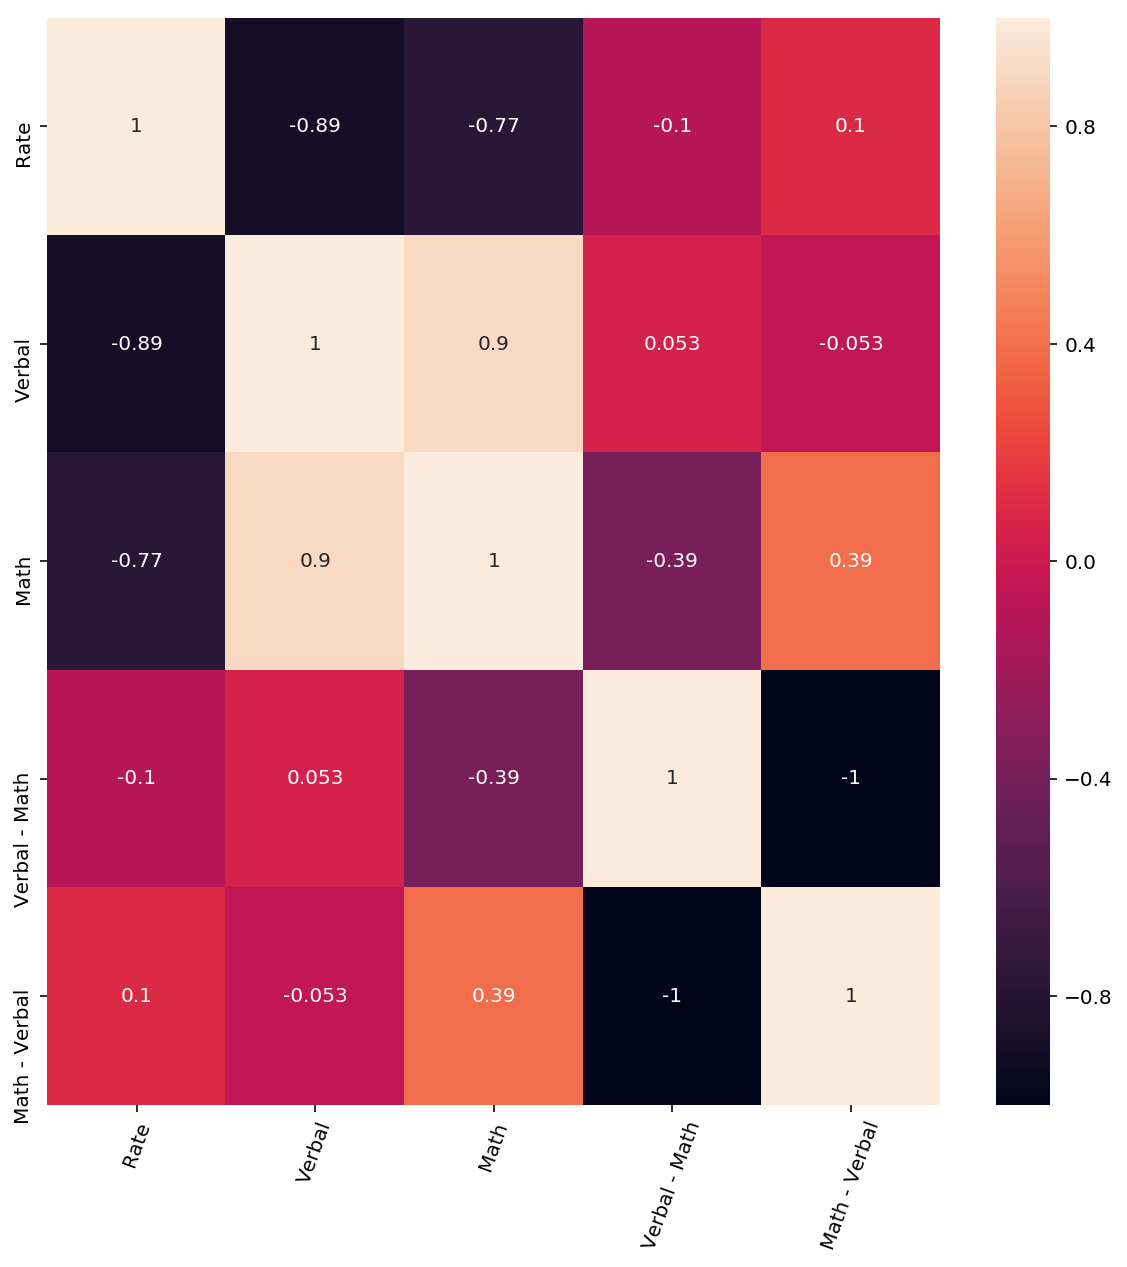

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(sat_original.corr(),annot=True)
plt.xticks(rotation=70) 

### ANSWER

1. Strong positive correlation between verbal and maths scores
2. Strong negative correlation between verbal scores and participation rate and fairly strong negative correlation between maths score and participation rate

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [28]:
round(sat_original.describe(),2)

,Rate,Verbal,Math,Verbal - Math,Math - Verbal
count,52.00,52.00,52.00,52.00,52.00
mean,37.15,532.02,531.50,0.52,-0.52
std,27.30,33.24,36.01,15.73,15.73
min,4.00,482.00,439.00,-30.00,-95.00
25%,9.00,501.00,504.00,-6.00,-4.25
50%,33.50,526.50,521.00,0.00,0.00
75%,63.50,562.00,555.75,4.25,6.00
max,82.00,593.00,603.00,95.00,30.00


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
round(sat_original.cov(),2)

,Rate,Verbal,Math,Verbal - Math,Math - Verbal
Rate,745.39,-804.36,-760.80,-43.55,43.55
Verbal,-804.36,1104.65,1077.15,27.50,-27.50
Math,-760.80,1077.15,1297.08,-219.93,219.93
Verbal - Math,-43.55,27.50,-219.93,247.43,-247.43
Math - Verbal,43.55,-27.50,219.93,-247.43,247.43


#### ANSWER:

1. Describe how the covariance matrix is different from the correlation matrix
Both covariance and correlation indicate similarly whether variables are positively or inversely related. However, the correlation matrix values are from -1 to 1 while the covariance matrix are not scaled down. 

2. What is the process to convert the covariance into the correlation?
Covariance divided by the standard deviation of the respective 2 variables will give correlation

3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
Correlation matrix is standardized to between -1 to 1 and in relation to the standard deviation of the variable hence easier to understand strength or weakness in relationship while the covariance matrix is harder to understand because of the lack of standardization  

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [62]:
drug_link = './drug-use-by-age.csv'
drug_original = pd.read_csv(drug_link)
drug = pd.read_csv(drug_link)
drug_original = drug
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [31]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [32]:
# need to change the columns from objects to numeric objects by first removing the dashes
drug = drug.replace('-',np.NaN)
drug.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null object
crack-use                  17 non-null float64
crack-frequency            14 non-null object
heroin-use                 17 non-null float64
heroin-frequency           16 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [33]:
col_names = list(drug.columns)
col_names[1:]

['n',
 'alcohol-use',
 'alcohol-frequency',
 'marijuana-use',
 'marijuana-frequency',
 'cocaine-use',
 'cocaine-frequency',
 'crack-use',
 'crack-frequency',
 'heroin-use',
 'heroin-frequency',
 'hallucinogen-use',
 'hallucinogen-frequency',
 'inhalant-use',
 'inhalant-frequency',
 'pain-releiver-use',
 'pain-releiver-frequency',
 'oxycontin-use',
 'oxycontin-frequency',
 'tranquilizer-use',
 'tranquilizer-frequency',
 'stimulant-use',
 'stimulant-frequency',
 'meth-use',
 'meth-frequency',
 'sedative-use',
 'sedative-frequency']

In [34]:
drug[col_names[1:]] = drug[col_names[1:]].apply(pd.to_numeric)
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [35]:
drug.groupby('age').size()

age
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22-23    1
24-25    1
26-29    1
30-34    1
35-49    1
50-64    1
65+      1
dtype: int64

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [36]:
drug.shape
# 17 rows + 28 columns

(17, 28)

In [37]:
round(drug.describe(),2)

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.00,17.00,17.00,17.00,17.00,17.00,16.00,17.00,14.00,17.00,...,17.00,16.00,17.00,17.00,17.00,17.00,17.00,15.00,17.00,17.00
mean,3251.06,55.43,33.35,18.92,42.94,2.18,7.88,0.29,15.04,0.35,...,0.94,14.81,2.81,11.74,1.92,31.15,0.38,35.97,0.28,19.38
std,1297.89,26.88,21.32,11.96,18.36,1.82,8.04,0.24,18.11,0.33,...,0.61,12.80,1.75,11.49,1.41,85.97,0.26,31.97,0.14,24.83
min,2223.00,3.90,3.00,1.10,4.00,0.00,1.00,0.00,1.00,0.00,...,0.00,3.00,0.20,4.50,0.00,2.00,0.00,2.00,0.00,3.00
25%,2469.00,40.10,10.00,8.70,30.00,0.50,5.00,0.00,5.00,0.10,...,0.40,5.75,1.40,6.00,0.60,7.00,0.20,12.00,0.20,6.50
50%,2798.00,64.60,48.00,20.80,52.00,2.00,5.25,0.40,7.75,0.20,...,1.10,12.00,3.50,10.00,1.80,10.00,0.40,30.00,0.30,10.00
75%,3058.00,77.50,52.00,28.40,52.00,4.00,7.25,0.50,16.50,0.60,...,1.40,18.12,4.20,11.00,3.00,12.00,0.60,47.00,0.40,17.50
max,7391.00,84.20,52.00,34.00,72.00,4.90,36.00,0.60,62.00,1.10,...,1.70,46.00,5.40,52.00,4.10,364.00,0.90,105.00,0.50,104.00


In [38]:
corr_table = round(drug.corr(),2)
corr_table

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.00,0.31,0.31,-0.17,0.14,-0.02,0.37,0.28,0.55,0.01,...,-0.17,-0.02,-0.07,-0.10,-0.20,-0.11,-0.06,0.49,-0.12,0.26
alcohol-use,0.31,1.00,0.90,0.59,0.92,0.77,0.25,0.88,0.20,0.68,...,0.59,-0.05,0.74,-0.55,0.58,-0.03,0.68,0.28,0.32,0.09
alcohol-frequency,0.31,0.90,1.00,0.26,0.82,0.58,0.39,0.79,0.33,0.55,...,0.25,0.12,0.45,-0.42,0.29,0.26,0.43,0.25,0.03,0.20
marijuana-use,-0.17,0.59,0.26,1.00,0.62,0.88,-0.27,0.62,-0.48,0.71,...,0.97,-0.32,0.94,-0.40,0.97,-0.39,0.87,0.01,0.62,-0.28
marijuana-frequency,0.14,0.92,0.82,0.62,1.00,0.74,0.25,0.89,0.11,0.63,...,0.61,0.04,0.77,-0.59,0.56,-0.07,0.66,0.32,0.40,0.05
cocaine-use,-0.02,0.77,0.58,0.88,0.74,1.00,-0.16,0.84,-0.34,0.90,...,0.87,-0.08,0.92,-0.29,0.92,-0.31,0.89,0.04,0.46,-0.16
cocaine-frequency,0.37,0.25,0.39,-0.27,0.25,-0.16,1.00,0.25,0.88,-0.21,...,-0.28,-0.24,-0.19,-0.14,-0.35,0.82,-0.19,0.17,-0.13,0.77
crack-use,0.28,0.88,0.79,0.62,0.89,0.84,0.25,1.00,0.17,0.75,...,0.60,0.06,0.77,-0.35,0.62,-0.29,0.69,0.28,0.44,0.09
crack-frequency,0.55,0.20,0.33,-0.48,0.11,-0.34,0.88,0.17,1.00,-0.42,...,-0.53,-0.20,-0.42,-0.23,-0.51,0.90,-0.40,0.26,-0.06,0.61
heroin-use,0.01,0.68,0.55,0.71,0.63,0.90,-0.21,0.75,-0.42,1.00,...,0.78,0.04,0.82,-0.18,0.81,-0.28,0.82,-0.08,0.33,-0.02


In [39]:
corr_table['highest_corr_drug'] = corr_table[col_names[2:]].sum(axis=1)
corr_table['highest_corr_drug'].sort_values(ascending=False)

crack-use                  9.28
cocaine-use                8.81
alcohol-use                8.43
marijuana-frequency        8.30
tranquilizer-use           8.23
heroin-use                 7.81
meth-use                   7.52
pain-releiver-use          7.23
stimulant-use              7.18
oxycontin-use              7.16
marijuana-use              7.14
alcohol-frequency          6.99
hallucinogen-use           6.68
sedative-use               4.80
meth-frequency             2.62
cocaine-frequency          2.34
heroin-frequency           1.98
n                          1.64
crack-frequency            0.95
sedative-frequency         0.74
oxycontin-frequency       -0.60
hallucinogen-frequency    -0.77
stimulant-frequency       -1.24
pain-releiver-frequency   -1.44
tranquilizer-frequency    -2.54
inhalant-frequency        -3.84
inhalant-use              -4.78
Name: highest_corr_drug, dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]), <a list of 27 Text xticklabel objects>)

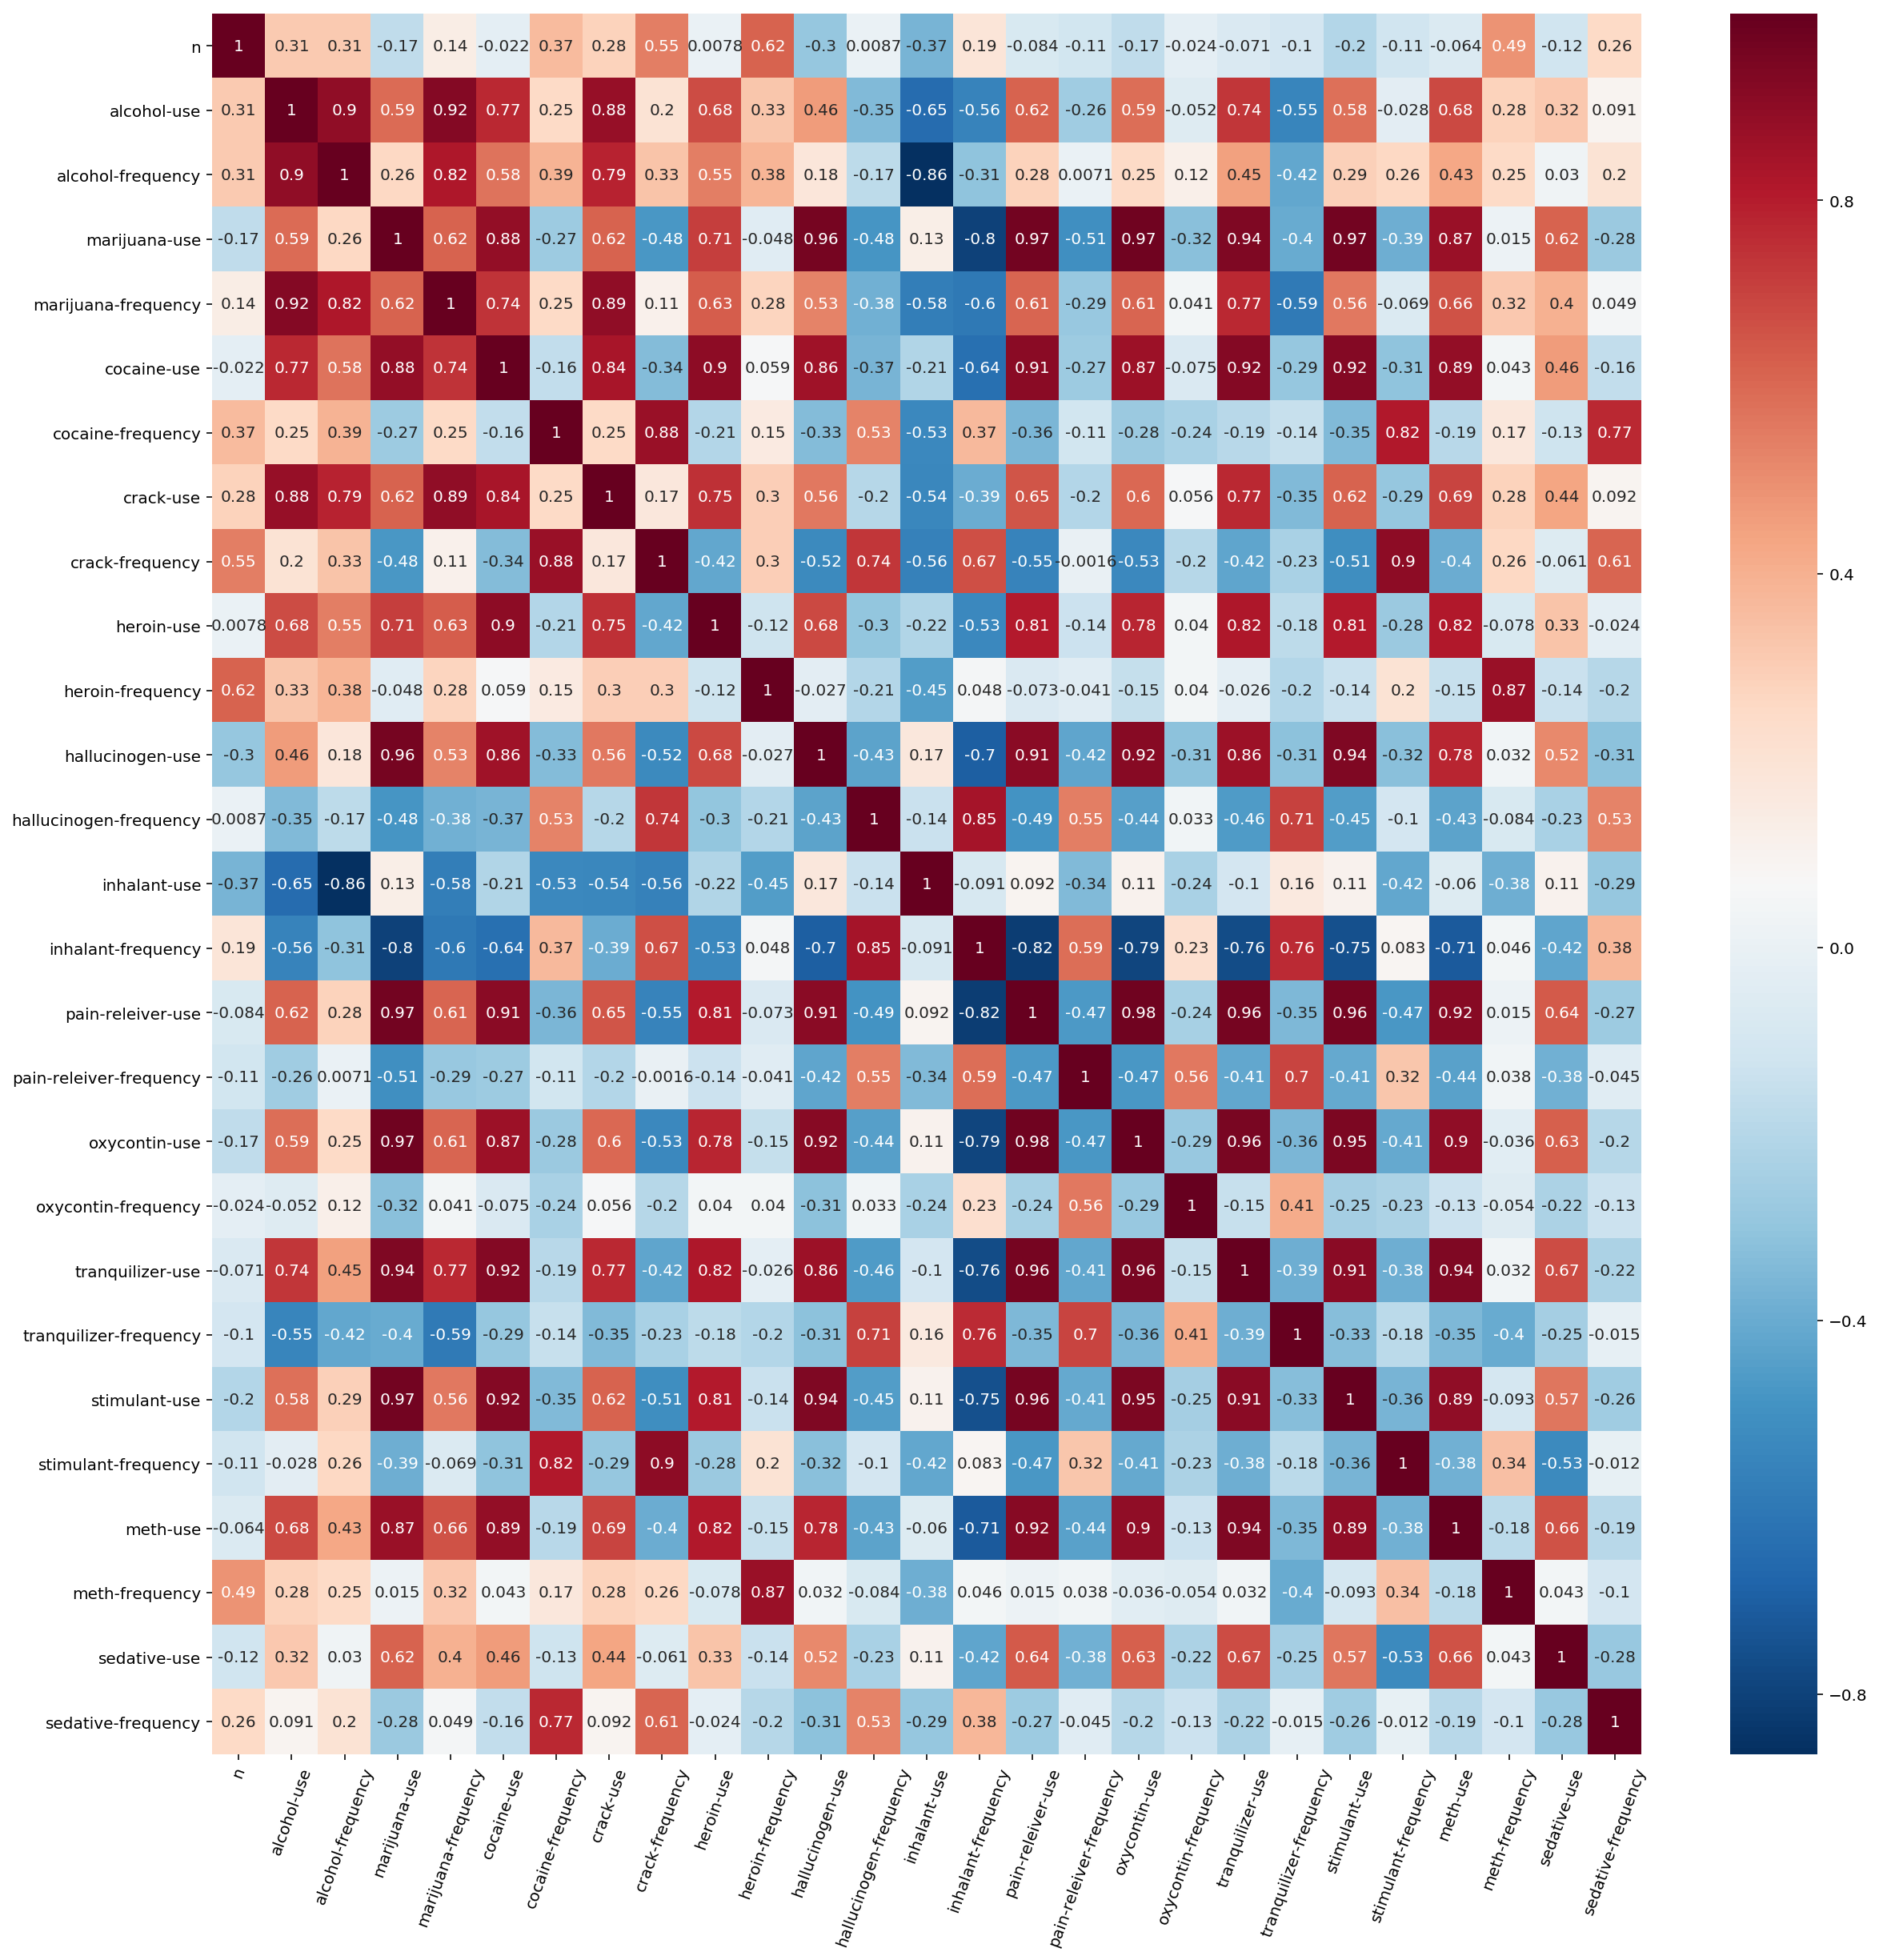

In [40]:
plt.figure(figsize = (20,20))
sns.heatmap(drug.corr(),annot=True,cmap="RdBu_r")
plt.xticks(rotation=70) 


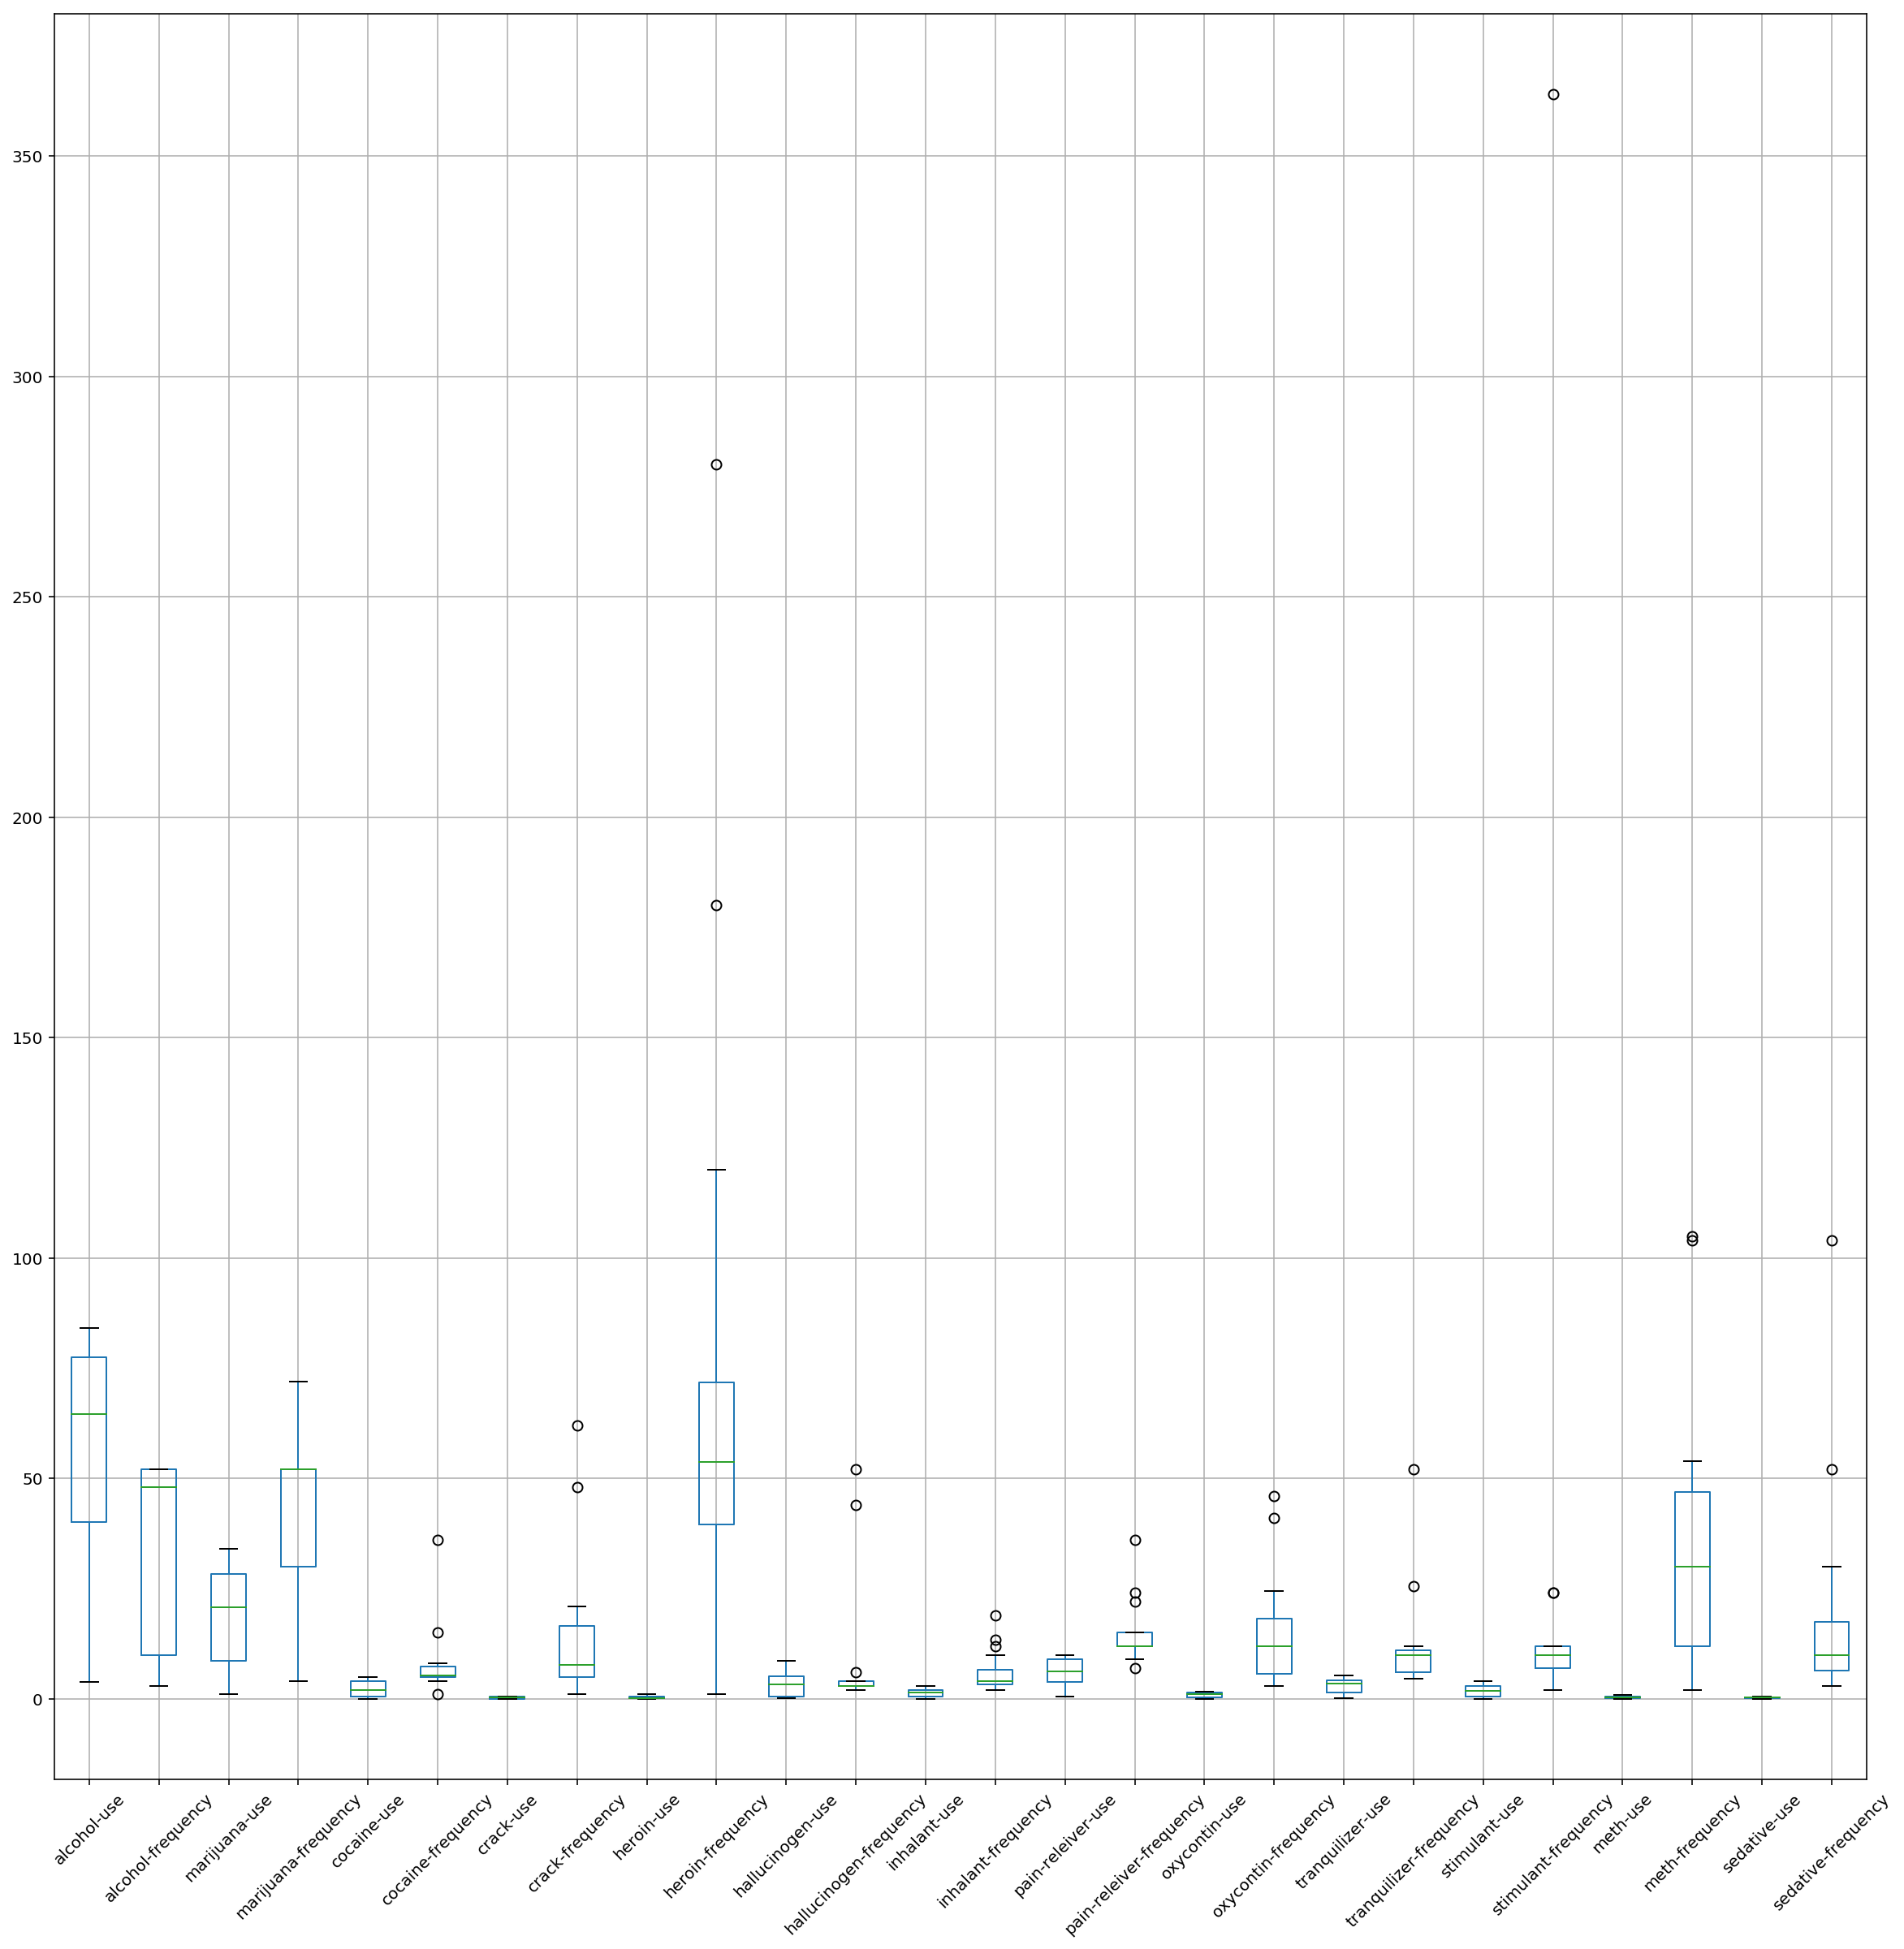

In [41]:
plt.figure(figsize = (20,20))
drug[col_names[2:]].boxplot(rot = 45)

#### ANSWER
1. Some drugs (eg. alcohol, marijuana, cocaine etc) usage have a high correlation with other drugs usage
2. Usage varies widely for each drug with some drugs like alcohol, heroin and meth having wide interquartile ranges
3. crack-use, cocaine-use, alcohol-use has highest correlation with other drugs

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

### ANSWER
Want to find out if the correlation between marijuana use and alcohol use is statistically significant

In [42]:
from scipy import stats
t,p = stats.ttest_ind(drug['marijuana-use'],drug['alcohol-use'])
t,p

# usage between samples are statistically different

(-5.116246810580653, 1.4171567091021532e-05)

In [43]:
stats.pearsonr(drug['marijuana-use'],drug['alcohol-use'])

# even though the correlation coeffecient between marijuana use and alcohol use is 0.59, it is still statistically significant p-value < 0.05

(0.5941650600365184, 0.011899695149154673)

In [44]:
# as a comparison, I want to see the pearson correlation of 2 highly correlated drug usage (picked from above)
stats.pearsonr(drug['crack-use'],drug['alcohol-use'])

(0.8773780367593143, 3.7325877559905506e-06)

#### CONCLUSION

1. Samples are satistically different for mariguana-use and alcohol-use
2. Correlation even though lower at 0.59 is still satistically significant < 0.05 hence, we should reject the null hypothesis that the correlation is not statistically significant

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

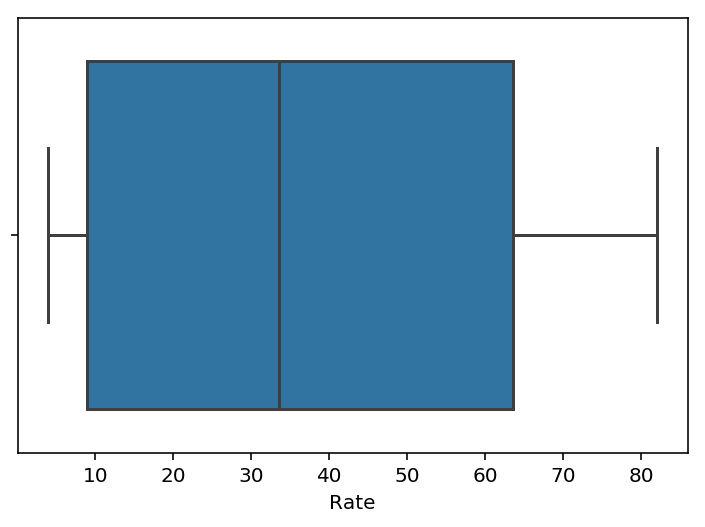

In [45]:
sns.boxplot(sat_original['Rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2bae9470>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2bae9b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2bae9080>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2bae9f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2baf3518>],
 'means': []}

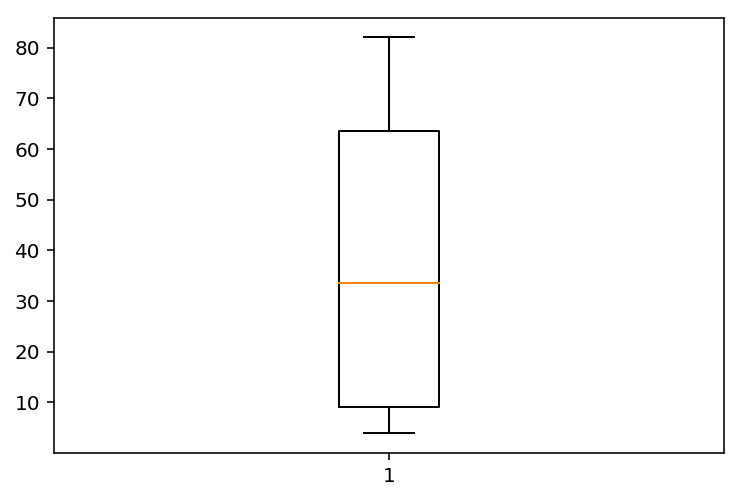

In [46]:
plt.boxplot(sat_original['Rate'])

#### ANSWER

1. Are there outliers in the dataset? Define, in words, how you numerically define outliers.

No. No outliers in the datset. Outliers are defined as values either above or below 1.5 x the interquartile range more or less from the interquartile range.  

2. Print out the outliers in the dataset.

No outliers

3. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

No difference

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [47]:
print('Pearson Correlation is', stats.pearsonr(sat_original['Verbal'],sat_original['Math']))

stats.spearmanr(sat_original['Verbal'],sat_original['Math'])

Pearson Correlation is (0.899870852544429, 1.192002673306768e-19)


SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

#### ANSWER
1. How does the spearman correlation compare to the pearson correlation?

Similar, Pearson is 0.90, while Spearman is 0.91

2. Describe clearly in words the process of calculating the spearman rank correlation.

Spearman excludes the values bur just looks at the rank of the values. Hence, excluding outliers that could significantly change the result of the correlation. If the relationship is that one variable increases when the other increases, but the amount is not consistent, the Pearson correlation coefficient is positive but less than +1. The Spearman coefficient still equals +1 in this case.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [48]:
sat_original['Rate Percentile'] = [stats.percentileofscore(sat_original['Rate'],sat_original['Rate'][i]) for i, r in enumerate(sat_original['Rate'])]
sat_original.head()


,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal,Rate Percentile
0,CT,82,509,510,-1,1,100.000000
1,NJ,81,499,513,-14,14,98.076923
2,MA,79,511,515,-4,4,96.153846
3,NY,77,495,505,-10,10,94.230769
4,NH,72,520,516,4,-4,92.307692


In [49]:
sat_original[sat_original['State'] == 'CA'][['State', 'Rate Percentile']]

,State,Rate Percentile
23,CA,56.730769


#### ANSWER

How is percentile related to the spearman rank correlation?
Spearman's correlation is related to rank and percentile of a value in a particular column. Hence, the spearman correlation between 2 columns is the same as the correlation of a column and the percentile of another (see below))

In [50]:
# shows the pearson and spearman correlation between rate and verbal columns

print(stats.pearsonr(sat_original['Rate'],sat_original['Verbal']))
print(stats.spearmanr(sat_original['Rate'],sat_original['Verbal']))


(-0.8864321428755695, 2.359415635242667e-18)
SpearmanrResult(correlation=-0.8332941751758289, pvalue=1.8007540456756275e-14)


In [51]:
# shows the pearson and spearman correlation between rate percentile and verbal columns

print(stats.pearsonr(sat_original['Rate Percentile'],sat_original['Verbal']))
print(stats.spearmanr(sat_original['Rate Percentile'],sat_original['Verbal']))

# note that the 'spearman correlation between rate percentile and verbal columns' and 
# 'spearman correlation between rate and verbal columns' is exactly the same

(-0.8744947697280814, 2.481098717919307e-17)
SpearmanrResult(correlation=-0.8332941751758289, pvalue=1.8007540456756275e-14)


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [52]:
drug['alcohol-use'].head()

0     3.9
1     8.5
2    18.1
3    29.2
4    40.1
Name: alcohol-use, dtype: float64

Text(0.5, 0, 'alcohol-use')

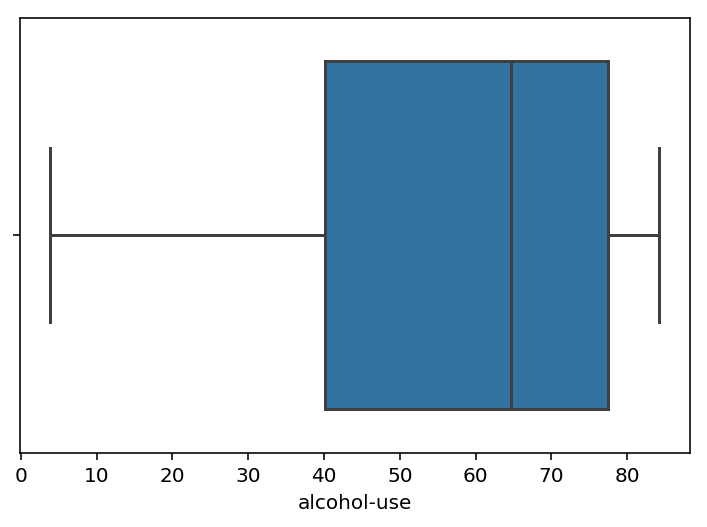

In [53]:
drug['alcohol-use-percentile'] = [stats.percentileofscore(drug['alcohol-use'],drug['alcohol-use'][i]) for i,a in enumerate(drug['alcohol-use'])]
sns.boxplot(drug[['alcohol-use']])
plt.xlabel('alcohol-use')

Text(0.5, 0, 'alcohol-use-percentile')

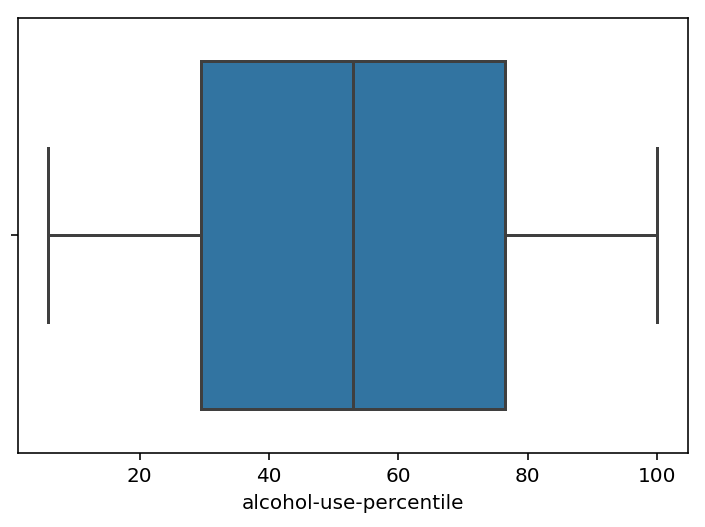

In [54]:
sns.boxplot(drug[['alcohol-use-percentile']])

plt.xlabel('alcohol-use-percentile')

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1795: RuntimeWarning: invalid value encountered in less
  left = np.count_nonzero(a < score)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1796: RuntimeWarning: invalid value encountered in less_equal
  right = np.count_nonzero(a <= score)


Text(0.5, 0, 'heroin-frequency')

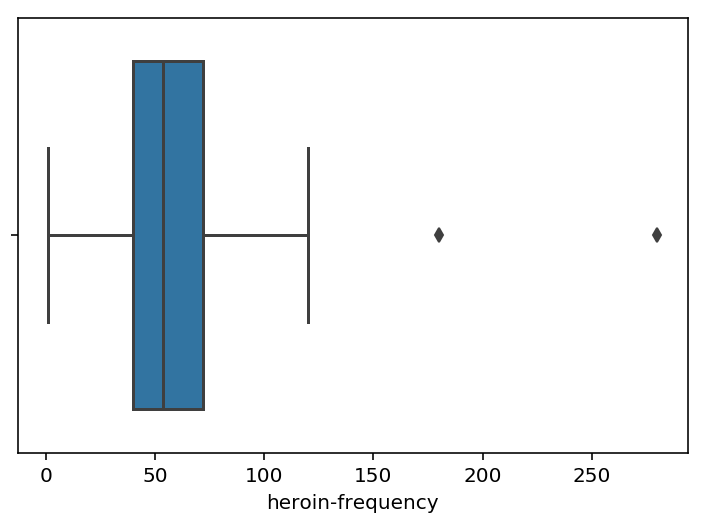

In [55]:
drug['heroin-frequency-percentile'] = [stats.percentileofscore(drug['heroin-frequency'],drug['heroin-frequency'][i]) for i,a in enumerate(drug['heroin-frequency'])]
sns.boxplot(drug[['heroin-frequency']])
plt.xlabel('heroin-frequency')

Text(0, 0.5, 'percentile')

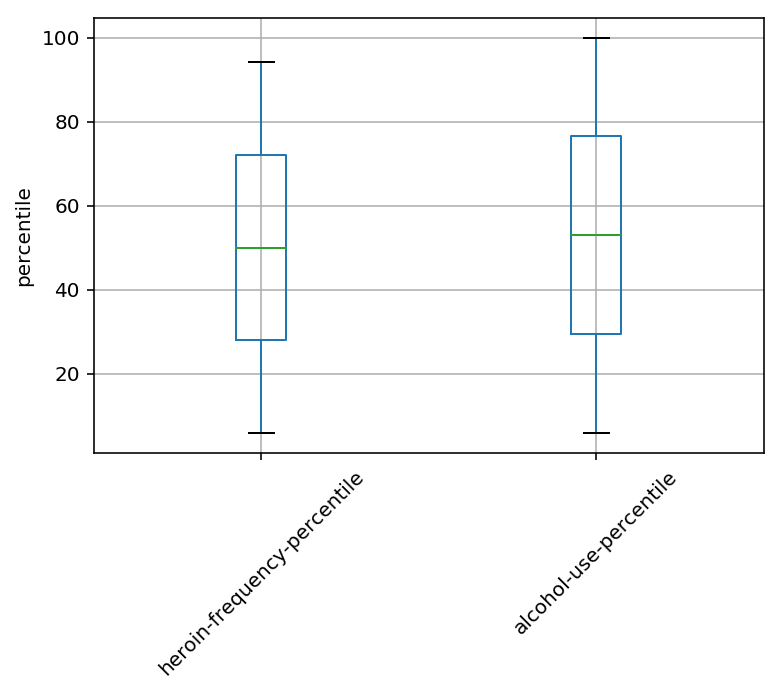

In [56]:
drug[['heroin-frequency-percentile','alcohol-use-percentile']].boxplot(rot = 45)
plt.ylabel('percentile')

# using percentiles can easier compare values across distribution over a standardized 0 - 100 base. Similar to correlation


Text(0, 0.5, 'alcohol-use-percentile')

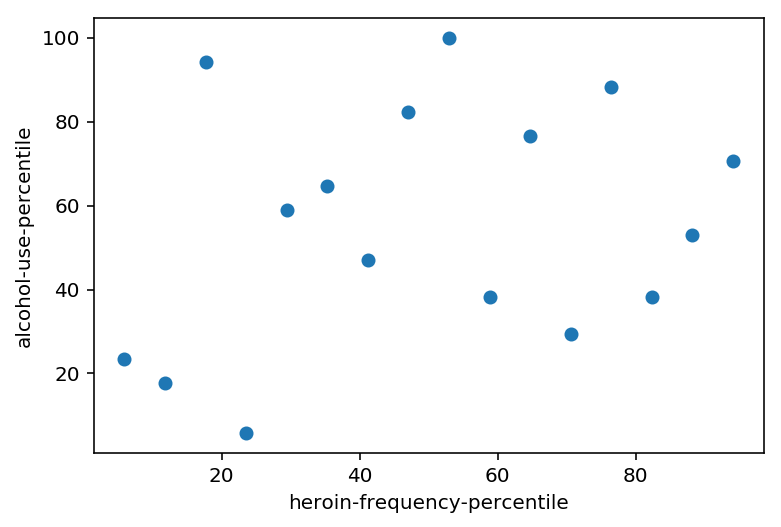

In [57]:
plt.scatter(drug[['heroin-frequency-percentile']],drug[['alcohol-use-percentile']])
plt.xlabel('heroin-frequency-percentile')
plt.ylabel('alcohol-use-percentile')


Text(0, 0.5, 'alcohol-use')

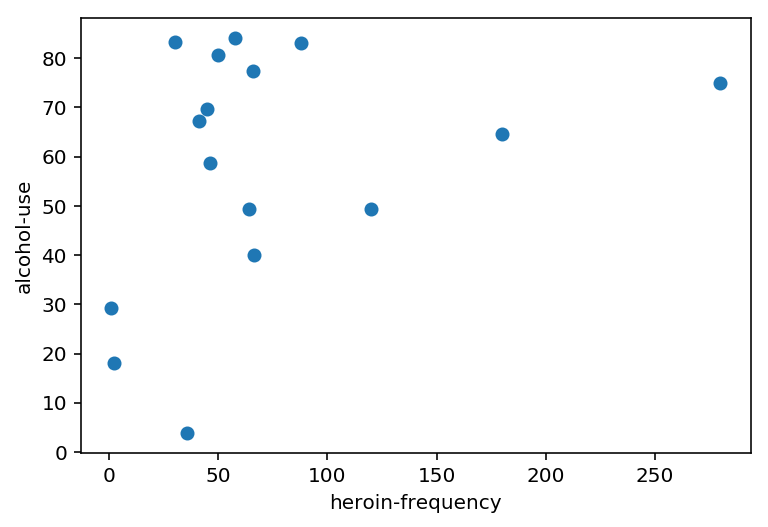

In [58]:
plt.scatter(drug[['heroin-frequency']],drug[['alcohol-use']])
plt.xlabel('heroin-frequency')
plt.ylabel('alcohol-use')

#### ANSWER

1. Why might percentile scoring be useful for dealing with outliers?

Able to better see them using  when scaled to a base of 0 to 100. Easier for comparison between different columns

2. Describe the effect, visually, of coverting raw scores to percentile.

More centralized values but lose data as the values are converted to percentiles instead. 